<a href="https://colab.research.google.com/github/shauryasachdev/Deep-Learning/blob/main/Classification_Captioning_Aircraft_Damage_Pretrained_Models_Recap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install pandas==2.2.3
!pip install tensorflow_cpu==2.19.0
!pip install pillow==11.1.0
!pip install matplotlib==3.9.2
!pip install transformers==4.38.2
!pip install torch==2.2.0+cpu torchvision==0.17.0+cpu torchaudio==2.2.0+cpu --index-url https://download.pytorch.org/whl/cpu
!pip install ml_dtypes>=0.5.0
!pip install numpy==1.26.4

Looking in indexes: https://download.pytorch.org/whl/cpu


In [4]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['KERAS_BACKEND'] = 'tensorflow'

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
import zipfile
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.applications import VGG16
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import random

In [6]:
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [7]:
batch_size = 32
n_epochs = 5
img_rows, img_cols = 224, 224
input_shape = (img_rows, img_cols, 3)

In [8]:
import tarfile
import urllib.request
import os
import shutil

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ZjXM4RKxlBK9__ZjHBLl5A/aircraft-damage-dataset-v1.tar"

tar_filename = 'aircraft-damage-dataset-v1.tar'
extracted_folder = 'aircraft-damage-dataset_v1'

# Extract to Drive for persistence (adjust subfolder if needed)
drive_extract_path = '/content/drive/MyDrive/Colab Notebooks/' + extracted_folder

urllib.request.urlretrieve(url, tar_filename)
print(f"Downloaded: {tar_filename}. Extraction will begin now")

if os.path.exists(extracted_folder):
  print(f"The folder '{extracted_folder}' already exists. Removing the existing folder.")

  shutil.rmtree(extracted_folder)
  print(f"Removed the existing folder: {extracted_folder}")

with tarfile.open(tar_filename, "r") as tar_ref:
  tar_ref.extractall(drive_extract_path) # This will extract to the current directory
  print(f"Extracted {tar_filename} successfully to {drive_extract_path}.")

Downloaded: aircraft-damage-dataset-v1.tar. Extraction will begin now
Extracted aircraft-damage-dataset-v1.tar successfully to /content/drive/MyDrive/Colab Notebooks/aircraft-damage-dataset_v1.


In [9]:
extract_path = drive_extract_path
train_dir = os.path.join(extract_path, "train")
test_dir = os.path.join(extract_path, "test")
valid_dir = os.path.join(extract_path, "valid")

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [11]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),
    batch_size = batch_size,
    seed = seed_value,
    class_mode = 'binary',
    shuffle=True
)

Found 300 images belonging to 2 classes.


In [12]:
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    seed = seed_value,
    batch_size = batch_size,
    shuffle = False,
    class_mode = 'binary',
    target_size = (img_rows, img_cols)
)

Found 96 images belonging to 2 classes.


In [13]:
test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    seed = seed_value,
    class_mode = 'binary',
    batch_size = batch_size,
    shuffle = False,
    target_size = (img_rows, img_cols)
)

Found 50 images belonging to 2 classes.


In [14]:
base_model = VGG16(
   weights='imagenet',
   include_top = False,
   input_shape = (img_rows, img_cols, 3)
)

In [15]:
output = base_model.layers[-1].output
output = keras.layers.Flatten()(output)
base_model = Model(base_model.input, output)

for layer in base_model.layers:
  layer.trainable = False

In [16]:
model = Sequential()
model.add(base_model)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_generator,
    epochs=n_epochs,
    validation_data=valid_generator,
)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 283s 27s/step - accuracy: 0.4986 - loss: 62.5627 - val_accuracy: 0.5000 - val_loss: 2.7364
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 258s 26s/step - accuracy: 0.5488 - loss: 1.7504 - val_accuracy: 0.5625 - val_loss: 0.7451
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 277s 30s/step - accuracy: 0.5748 - loss: 0.8524 - val_accuracy: 0.6146 - val_loss: 0.6149
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 260s 27s/step - accuracy: 0.6708 - loss: 0.5424 - val_accuracy: 0.6771 - val_loss: 0.5493
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 270s 27s/step - accuracy: 0.7803 - loss: 0.5018 - val_accuracy: 0.6562 - val_loss: 0.5748


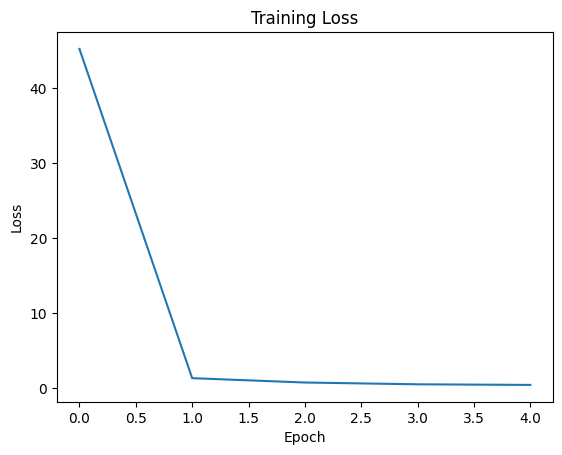

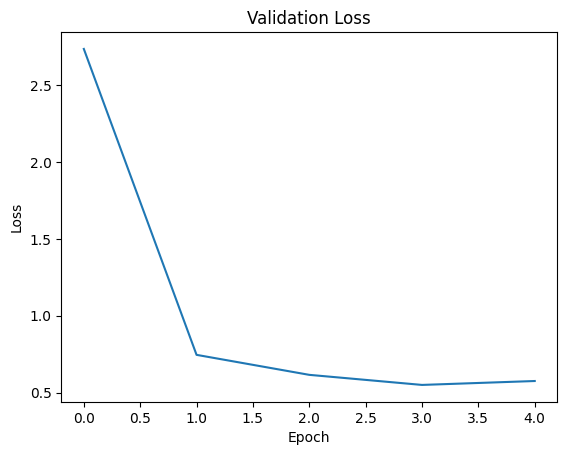

In [19]:
# Plot the loss for both training and validation
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.show()

plt.title("Validation Loss")
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.plot(history.history['val_loss'])
plt.show()

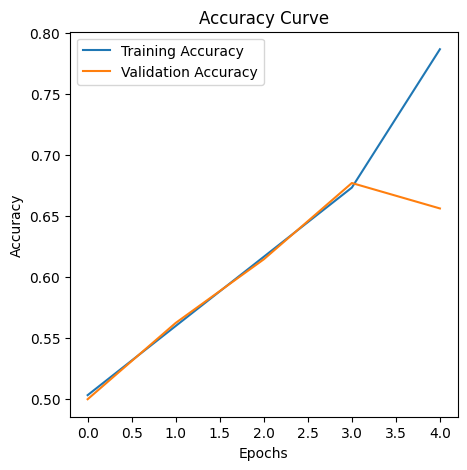

In [20]:
train_history = history.history

plt.figure(figsize=(5, 5))
plt.plot(train_history['accuracy'], label='Training Accuracy')
plt.plot(train_history['val_accuracy'], label='Validation Accuracy')

plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.6875 - loss: 0.6137
Test Loss: 0.6137
Test Accuracy: 0.6875


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def plot_image_with_title(image, model, true_label, predicted_label, class_names):
  plt.figure(figsize=(6,6))
  plt.imshow(image)

  true_label_name = class_names[true_label]
  pred_label_name = class_names[predicted_label]

  plt.title(f"True: {true_label_name}\nPred: {pred_label_name}")
  plt.axis('off')
  plt.show()

def test_model_on_image(test_generator, model, index_to_plot=0):
  # Get a batch of images and labels from the test generator
  test_images, test_labels = next(test_generator)

  # Make predictions on the batch
  predictions = model.predict(test_images)

  # In binary classification, predictions are probabilities (float). Convert to binary (0 or 1)
  predicted_classes = (predictions > 0.5).astype(int).flatten()

  # Get the class indices from the test generator and invert them to get class names
  class_indices = test_generator.class_indices
  class_names = {v: k for k, v in class_indices.items()}  # Invert the dictionary

  # Specify the image to display based on the index
  image_to_plot = test_images[index_to_plot]
  true_label = test_labels[index_to_plot]
  predicted_label = predicted_classes[index_to_plot]

  # Plot the selected image with its true and predicted labels
  plot_image_with_title(image=image_to_plot, model=model, true_label=true_label, predicted_label=predicted_label, class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step


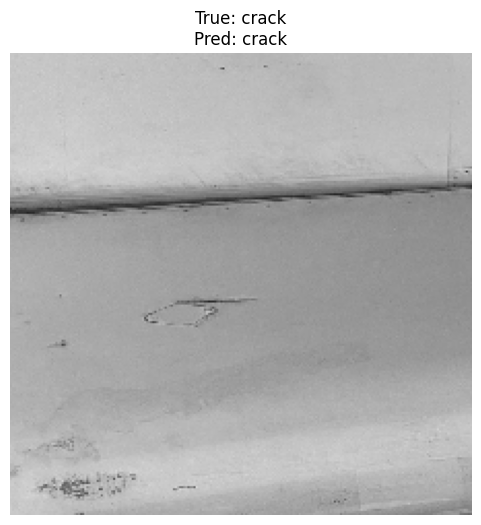

In [23]:
index_to_plot = 1

test_model_on_image(
    test_generator,   # test_data_generator
    model,            # trained model
    index_to_plot=index_to_plot
)

In [32]:
#Load the required libraries
import torch
import tensorflow as tf
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

In [33]:
#load the pretrained BLIP processor and model:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [34]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [ ]:
#Load the required libraries
import torch
import tensorflow as tf
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

In [35]:
class BlipCaptionSummaryLayer(tf.keras.layers.Layer):
    def __init__(self, processor, model, **kwargs):
        super().__init__(**kwargs)
        self.processor = processor
        self.model = model

    def call(self, image_path, task):
        return tf.numpy_function(self.process_image, [image_path, task], tf.string)

    def process_image(self, image_path, task):
        try:
            print("Debug: Starting image processing")
            image_path_str = image_path.item().decode("utf-8")
            print(f"Debug: Image path: {image_path_str}")
            image = Image.open(image_path_str).convert("RGB")
            print("Debug: Image loaded successfully")
            task_str = task.item().decode("utf-8")
            print(f"Debug: Task: {task_str}")
            if task_str == "Caption":
                prompt = "A picture of an aircraft with damage such as"  # Customized for dataset
            else:
                prompt = "A detailed view of aircraft surface showing damage like dents, scratches, or cracks:"
            print(f"Debug: Prompt: {prompt}")

            # Critical update: Wrap in lists to force batching, plus padding=True
            inputs = self.processor(images=[image], text=[prompt], return_tensors="pt", padding=True)
            print("Debug: Inputs prepared successfully")

            # Generate with params for better results
            output = self.model.generate(**inputs, max_length=100, num_beams=5, early_stopping=True)
            print("Debug: Generation completed")

            result = self.processor.decode(output[0], skip_special_tokens=True)
            print(f"Debug: Result: {result}")
            return result
        except Exception as e:
            print(f"Detailed error: {str(e)}")
            return "Error Processing Image"

In [36]:
class BlipCaptionSummaryLayer(tf.keras.layers.Layer):
    def __init__(self, processor, model, **kwargs):
        """
        Initialize the custom Keras layer with the BLIP processor and model.

        Args:
            processor: The BLIP processor for preparing inputs for the model.
            model: The BLIP model for generating captions or summaries.
        """
        super().__init__(**kwargs)
        self.processor = processor
        self.model = model

    def call(self, image_path, task):
        # Use tf.py_function to run the custom image processing and text generation
        return tf.py_function(self.process_image, [image_path, task], tf.string)

    def process_image(self, image_path, task):
        """
        Perform image loading, preprocessing, and text generation.

        Args:
            image_path: Path to the image file as a string.
            task: The type of task ("caption" or "summary").

        Returns:
            The generated caption or summary as a string.
        """
        try:
            # Decode the image path from the TensorFlow tensor to a Python string
            image_path_str = image_path.numpy().decode("utf-8")

            # Open the image using PIL and convert it to RGB format
            image = Image.open(image_path_str).convert("RGB")

            # Set the appropriate prompt based on the task
            if task.numpy().decode("utf-8") == "caption":
                prompt = "This is a picture of"  # Modify prompt for more natural output
            else:
                prompt = "This is a detailed photo showing"  # Modify for summary

            # Prepare inputs for the BLIP model
            inputs = self.processor(images=image, text=prompt, return_tensors="pt")

            # Generate text output using the BLIP model
            output = self.model.generate(**inputs)

            # Decode the output into a readable string
            result = self.processor.decode(output[0], skip_special_tokens=True)
            return result
        except Exception as e:
            # Handle errors during image processing or text generation
            print(f"Error: {e}")
            return "Error processing image"

In [77]:
# Define a helper function to use the custom Keras layer
def generate_text(image_path, task):
    # Create an instance of the custom Keras layer using the pretrained BLIP processor and model
    blip_layer = BlipCaptionSummaryLayer(processor, model)

    # Call the layer with the provided inputs
    return blip_layer(image_path, task)

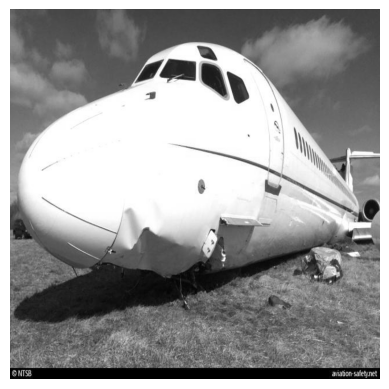

In [78]:
# We will use the following image to display Caption and Summary for Task 9 and 10
# URL of the image
image_url = os.path.join(extract_path, "test/dent/149_22_JPG_jpg.rf.4899cbb6f4aad9588fa3811bb886c34d.jpg")
# Load and display the image
img = plt.imread(image_url)
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [80]:
# Path to an example image
image_path = tf.constant(image_url)  # Use the already defined and validated image_url

# Generate a caption for the image
caption = generate_text(image_path, tf.constant("caption"))
# Decode and print the generated caption
print("Caption:", caption.numpy().decode("utf-8"))

# Generate a summary for the image
summary = generate_text(image_path, tf.constant("summary"))
# Decode and print the generated summary
print("Summary:", summary.numpy().decode("utf-8"))

Caption: this is a picture of a plane that was sitting on the ground in a field
Summary: this is a detailed photo showing the damage to the fuselage of the aircraft


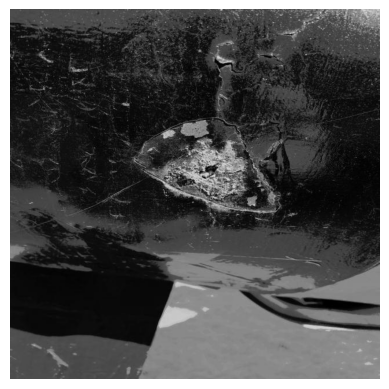

In [91]:
# We will use the following image to display Caption and Summary for Task 9 and 10
# URL of the image
image_url = os.path.join(extract_path, "test/dent/100_12_JPG_jpg.rf.c9eba14c33080322c8039295a4564509.jpg")
# Path to an example image
image_path = tf.constant(image_url)  # Use the already defined and validated image_url
# Load and display the image
img = plt.imread(image_url)
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [92]:
# Path to an example image
image_path = tf.constant(image_url)  # Use the already defined and validated image_url

# Generate a caption for the image
caption = generate_text(image_path, tf.constant("caption"))
# Decode and print the generated caption
print("Caption:", caption.numpy().decode("utf-8"))

# Generate a summary for the image
summary = generate_text(image_path, tf.constant("summary"))
# Decode and print the generated summary
print("Summary:", summary.numpy().decode("utf-8"))

Caption: this is a picture of a car that was in the water
Summary: this is a detailed photo showing the damage of the car that was involved in the crash


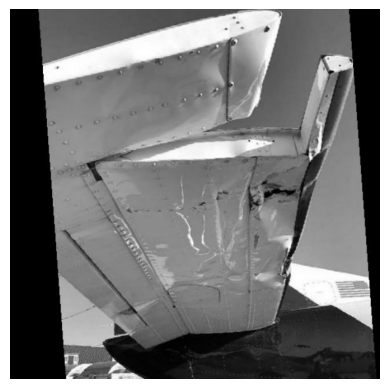

In [93]:
# We will use the following image to display Caption and Summary for Task 9 and 10
# URL of the image
image_url = os.path.join(extract_path, "test/dent/136_20_JPG_jpg.rf.e13ff88f88a3dbf20345eae5eeeb6bb4.jpg")
# Path to an example image
image_path = tf.constant(image_url)  # Use the already defined and validated image_url
# Load and display the image
img = plt.imread(image_url)
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

In [94]:
# Path to an example image
image_path = tf.constant(image_url)  # Use the already defined and validated image_url

# Generate a caption for the image
caption = generate_text(image_path, tf.constant("caption"))
# Decode and print the generated caption
print("Caption:", caption.numpy().decode("utf-8"))

# Generate a summary for the image
summary = generate_text(image_path, tf.constant("summary"))
# Decode and print the generated summary
print("Summary:", summary.numpy().decode("utf-8"))

Caption: this is a picture of the space shuttle in flight
Summary: this is a detailed photo showing the damage on the wing of the aircraft
